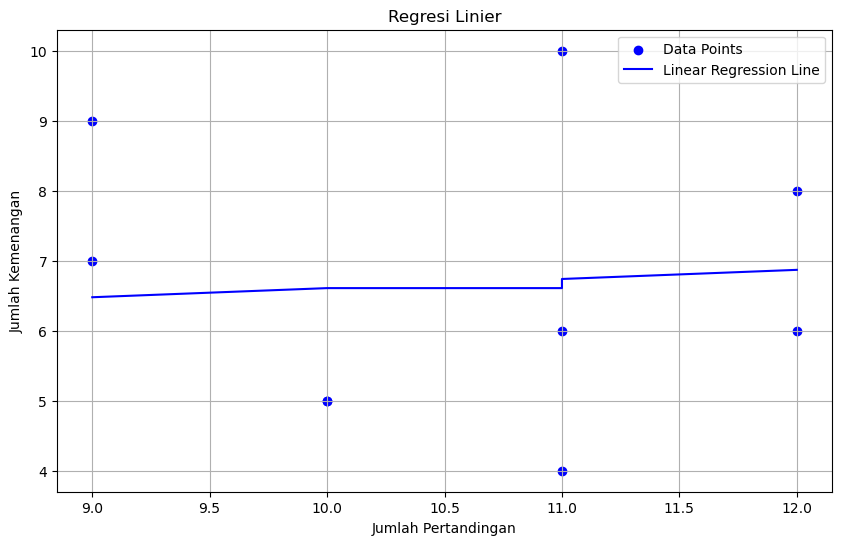

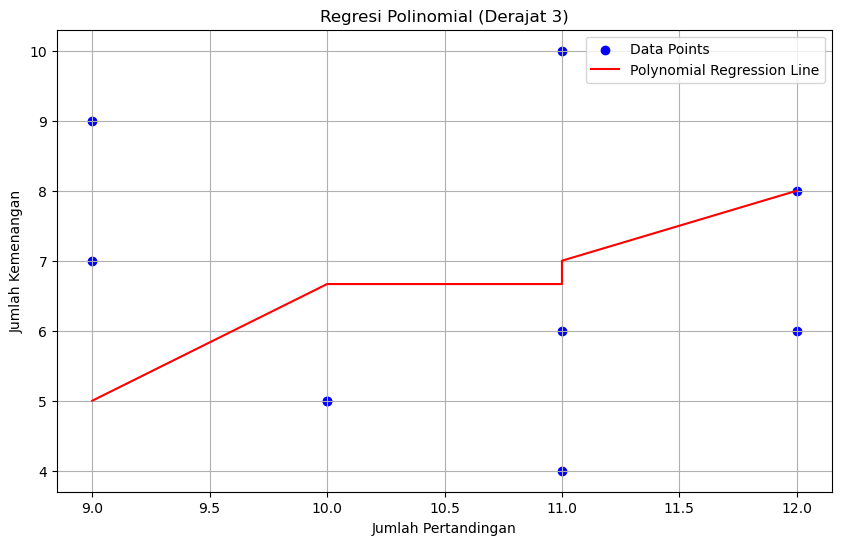

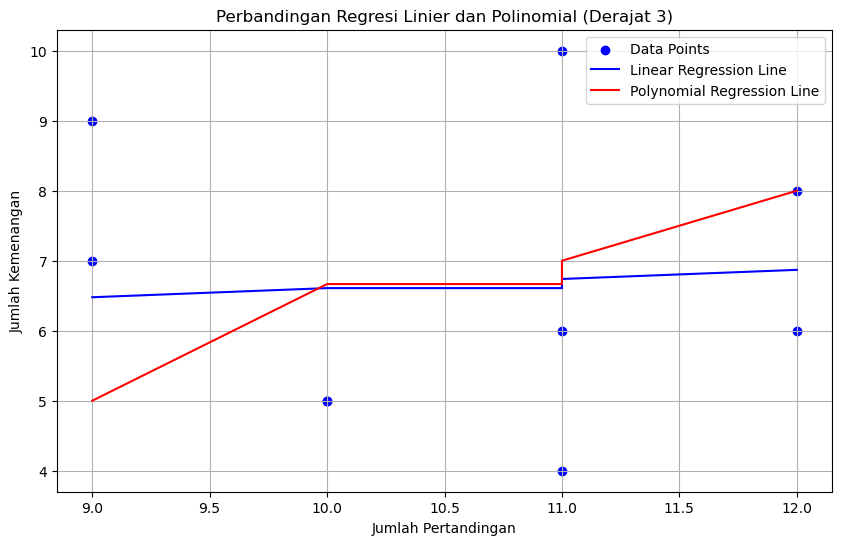

Rata-Rata Kesalahan Kuadrat (Regresi Linier):  3.5362318840579707
Rata-Rata Kesalahan Kuadrat (Regresi Polinomial):  2.518518518517845

Data Tim:
   Team  Matches  Wins  Losses
0  AURA       10     5       5
1  DEWA       12     6       6
2   RBL       11     4       7
3    AE        9     7       2
4   BTR       10     5       5
5  GEEK       11     6       5
6  EVOS       12     8       4
7   RRQ        9     9       0
8  ONIC       11    10       1

Tim yang lolos playoff menurut regresi linier:  ['AE' 'RRQ' 'AURA' 'BTR' 'RBL' 'GEEK']
Tim yang lolos playoff menurut regresi polinomial:  ['AE' 'RRQ' 'DEWA' 'EVOS' 'ONIC' 'RBL']
Regresi polinomial lebih baik untuk prediksi ini.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data tim MPL dengan variasi yang lebih besar
data = {
    'Team': ['AURA', 'DEWA', 'RBL', 'AE', 'BTR', 'GEEK', 'EVOS', 'RRQ', 'ONIC'],
    'Matches': [10, 12, 11, 9, 10, 11, 12, 9, 11],
    'Wins': [5, 6, 4, 7, 5, 6, 8, 9, 10],  # Variasi kemenangan
    'Losses': [5, 6, 7, 2, 5, 5, 4, 0, 1]  # Variasi kekalahan
}

df = pd.DataFrame(data)

# Menggunakan jumlah pertandingan untuk memprediksi kemenangan
X = df[['Matches']].values
y = df['Wins'].values

# Fungsi untuk menghitung koefisien regresi linier menggunakan np.linalg.lstsq
def linear_regression(X, y):
    X_b = np.c_[np.ones((len(X), 1)), X]  # Menambahkan bias term
    theta_best, _, _, _ = np.linalg.lstsq(X_b, y, rcond=None)
    return theta_best

# Fungsi untuk membuat prediksi menggunakan koefisien regresi linier
def predict_linear(X, theta):
    X_b = np.c_[np.ones((len(X), 1)), X]
    return X_b.dot(theta)

# Fungsi untuk menghitung mean squared error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Regresi linier
theta_linear = linear_regression(X, y)
y_pred_linear = predict_linear(X, theta_linear)

# Fungsi untuk menghitung koefisien regresi polinomial
def polynomial_features(X, degree):
    X_poly = np.ones((len(X), 1))
    for d in range(1, degree + 1):
        X_poly = np.c_[X_poly, X ** d]
    return X_poly

# Derajat polinomial yang lebih tinggi untuk memastikan perbedaan hasil
degree = 3
X_poly = polynomial_features(X, degree)

# Menambahkan bias term ke X_poly
X_poly_b = np.c_[np.ones((len(X_poly), 1)), X_poly]

# Regresi polinomial
theta_poly = linear_regression(X_poly, y)
y_pred_poly = X_poly_b.dot(theta_poly)

# Plot hasil regresi linier
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(np.sort(X, axis=0), np.sort(y_pred_linear, axis=0), color='blue', label='Linear Regression Line')
plt.xlabel('Jumlah Pertandingan')
plt.ylabel('Jumlah Kemenangan')
plt.legend()
plt.title('Regresi Linier')
plt.grid(True)
plt.show()

# Plot hasil regresi polinomial
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(np.sort(X, axis=0), np.sort(y_pred_poly, axis=0), color='red', label='Polynomial Regression Line')
plt.xlabel('Jumlah Pertandingan')
plt.ylabel('Jumlah Kemenangan')
plt.legend()
plt.title('Regresi Polinomial (Derajat 3)')
plt.grid(True)
plt.show()

# Plot gabungan hasil regresi linier dan polinomial
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(np.sort(X, axis=0), np.sort(y_pred_linear, axis=0), color='blue', label='Linear Regression Line')
plt.plot(np.sort(X, axis=0), np.sort(y_pred_poly, axis=0), color='red', label='Polynomial Regression Line')
plt.xlabel('Jumlah Pertandingan')
plt.ylabel('Jumlah Kemenangan')
plt.legend()
plt.title('Perbandingan Regresi Linier dan Polinomial (Derajat 3)')
plt.grid(True)
plt.show()

# Mean Squared Error untuk regresi linier dan polinomial
mse_linear = mean_squared_error(y, y_pred_linear)
mse_poly = mean_squared_error(y, y_pred_poly)
print("Rata-Rata Kesalahan Kuadrat (Regresi Linier): ", mse_linear)
print("Rata-Rata Kesalahan Kuadrat (Regresi Polinomial): ", mse_poly)

# Menentukan tim yang lolos playoff
df['Predicted_Wins_Linear'] = y_pred_linear
df['Predicted_Wins_Poly'] = y_pred_poly

# Hanya menyisakan 3 tim dengan poin terendah tidak masuk playoff
df_linear_sorted = df.sort_values(by='Predicted_Wins_Linear', ascending=False)
df_poly_sorted = df.sort_values(by='Predicted_Wins_Poly', ascending=False)

teams_linear_playoff = df_linear_sorted['Team'].iloc[:-3].values
teams_poly_playoff = df_poly_sorted['Team'].iloc[:-3].values

# Output prediksi
print("\nData Tim:")
print(df[['Team', 'Matches', 'Wins', 'Losses']])

print("\nTim yang lolos playoff menurut regresi linier: ", teams_linear_playoff)
print("Tim yang lolos playoff menurut regresi polinomial: ", teams_poly_playoff)


if mse_linear < mse_poly:
    print("Regresi linier lebih baik untuk prediksi ini.")
elif mse_poly < mse_linear:
    print("Regresi polinomial lebih baik untuk prediksi ini.")
else:
    print("Kedua metode regresi memiliki performa yang sama dalam prediksi ini.")
